<a href="https://colab.research.google.com/github/quratulain-coder/Dep/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 24.5MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.1MB/s]


In [5]:
import zipfile

In [6]:
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf

In [8]:
from tensorflow import keras

In [9]:
from keras import Sequential

In [26]:
from keras.layers import Dense, Conv2D , MaxPooling2D, Flatten, BatchNormalization, Dropout

In [27]:
#generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [28]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [29]:
#create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides= 2, padding = 'valid'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(256,256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides= 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(256,256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides= 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation= 'sigmoid'))

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 127, 127, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,844,033 (56.63 MB)

 Trainable params: 14,843,585 (56.62 MB)

 Non-trainable params: 448 (1.75 KB)

In [31]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
hisotry = model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.5356 - loss: 1.3778 - val_accuracy: 0.6296 - val_loss: 0.7865
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.6437 - loss: 0.6664 - val_accuracy: 0.6958 - val_loss: 0.5986
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 78ms/step - accuracy: 0.7365 - loss: 0.5206 - val_accuracy: 0.7492 - val_loss: 0.5410
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.7845 - loss: 0.4577 - val_accuracy: 0.6134 - val_loss: 0.6619
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.8141 - loss: 0.4048 - val_accuracy: 0.7348 - val_loss: 0.5451
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.8574 - loss: 0.3353 - val_accuracy: 0.7644 - val_loss: 0.5085
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.9006 - loss: 0.2464 - val_accuracy: 0.8160 - val_loss: 0.4744
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.9233 - loss: 0.1906 - 

In [35]:
import matplotlib.pyplot as plt

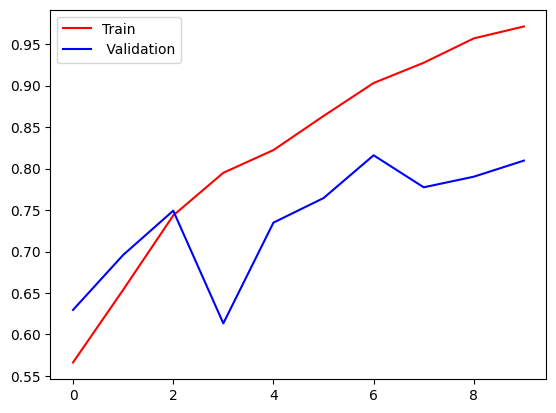

In [36]:
plt.plot(hisotry.history['accuracy'], color='red', label='Train') # Corrected attribute name to 'history' and label typo
plt.plot(hisotry.history['val_accuracy'], color='blue', label =" Validation")
plt.legend()
plt.show()

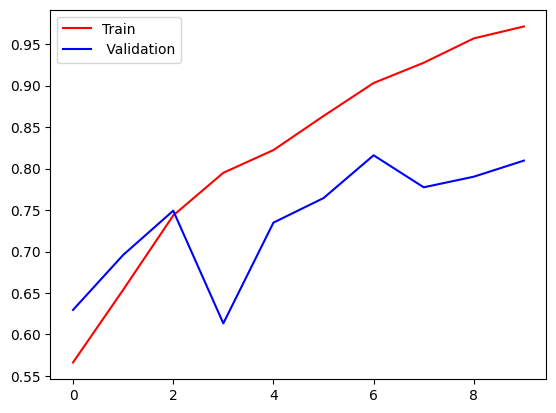

In [37]:
plt.plot(hisotry.history['accuracy'], color='red', label='Train') # Corrected attribute name to 'history' and label typo
plt.plot(hisotry.history['val_accuracy'], color='blue', label =" Validation")
plt.legend()
plt.show()

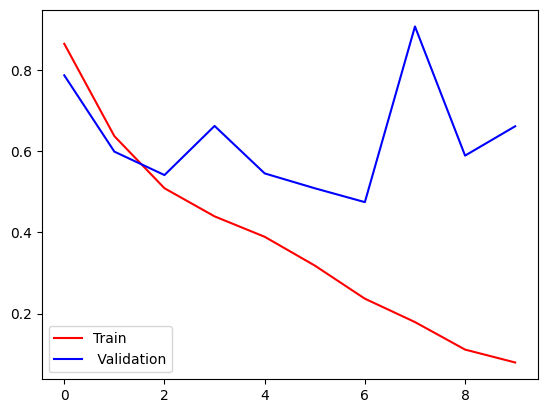

In [38]:
plt.plot(hisotry.history['loss'], color='red', label='Train') # Corrected attribute name to 'history' and label typo
plt.plot(hisotry.history['val_loss'], color='blue', label =" Validation")
plt.legend()
plt.show()

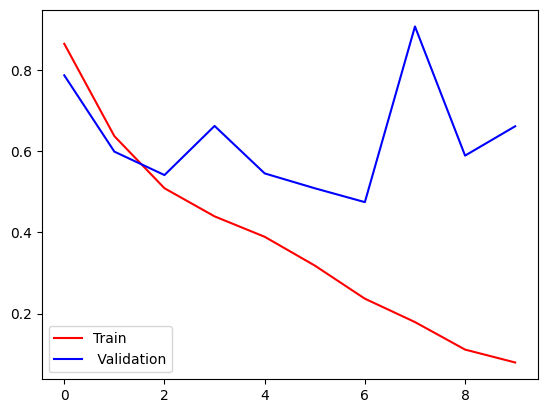

In [39]:
plt.plot(hisotry.history['loss'], color='red', label='Train') # Corrected attribute name to 'history' and label typo
plt.plot(hisotry.history['val_loss'], color='blue', label =" Validation")
plt.legend()
plt.show()

In [40]:
import cv2

In [55]:
test_img = cv2.imread('/content/test/dogs/dog.10310.jpg')

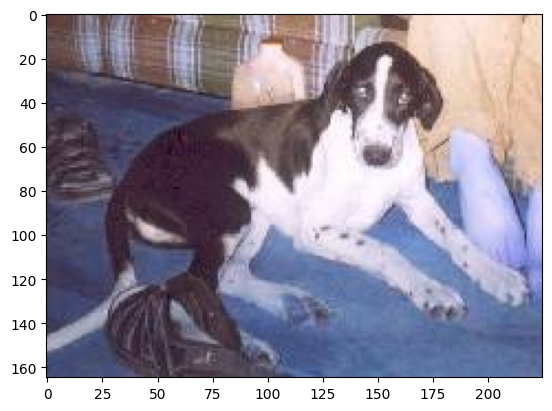

In [57]:
plt.imshow(test_img)

In [ ]:
test_img.shape

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))